<center><h2>Analyze the dataset for the IELTS Speaking Part 2 task</h2></center>

In [6]:
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import json
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

<h3>Open file all_data.json</h3>

In [55]:
with open('all_data.json') as file:
    datasets = json.load(file)

print(f"Length : {len(datasets)}, Type : {type(datasets)}")
datasets[:2]

Length : 6865, Type : <class 'list'>


[{'marking_ticket_id': '53309',
  'marking_ticket_answer_id': '98727',
  'part': 0,
  'question': 'Can you describe your town or village?',
  'answer': "I come from Hanoi - the capital of Vietnam. It's known as the city for peace because there are a lot of historic buildings and monuments associated with the glorious victories of Vietnamese people. In the past, Hanoi was an ancient town, and people used bicycles to travel to other places. Now Hanoi is developing with more skyscrapers and modern vehicles. In my mind, Hanoi is still a famous city for people come from other cities or other countries to visit."},
 {'marking_ticket_id': '53309',
  'marking_ticket_answer_id': '98728',
  'part': 0,
  'question': 'What places would you recommend people to visit in your town/village?',
  'answer': 'Because Hanoi is a city of peace, there are a lot of historic buildings and monuments that still remain today. I have visited two places and I was impressed at first sight. These two places are calle

<h3>Convert list to DataFrame</h3>

In [9]:
df = pd.DataFrame(datasets)
df.head(5)

,marking_ticket_id,marking_ticket_answer_id,part,question,answer
0,53309,98727,0,Can you describe your town or village?,I come from Hanoi - the capital of Vietnam. It...
1,53309,98728,0,What places would you recommend people to visi...,"Because Hanoi is a city of peace, there are a ..."
2,53309,98729,0,What are some popular festivals in your country?,"In Vietnam, we have an interesting festival ta..."
3,53309,98730,0,Describe your idea of a perfect holiday.,I have dreamed of visiting Denmark in Europe s...
4,53319,98741,0,Talk about a place you visited with friends.,I'd like to talk about my short trip to Baidin...


<h3>DataFrame Info</h3>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   marking_ticket_id         6865 non-null   object
 1   marking_ticket_answer_id  6865 non-null   object
 2   part                      6865 non-null   int64 
 3   question                  6865 non-null   object
 4   answer                    6865 non-null   object
dtypes: int64(1), object(4)
memory usage: 268.3+ KB


<h2>Analyst Data</h2>

<h3>1. Analyst marking_ticket_id</h3>

In [11]:
ticket_unique = df.marking_ticket_id.value_counts()
ticket_unique

marking_ticket_id
30088    16
53306     8
30424     8
30467     8
30463     8
         ..
56022     1
56024     1
59811     1
58644     1
58704     1
Name: count, Length: 2195, dtype: int64

<h4>There are 2195 people conducting QA in the IELTS Speaking Part 2 task."</h4>

In [12]:
counter = collections.Counter(list(ticket_unique))
print(sorted(counter.items()))
print("Average : ",np.average(list(ticket_unique)))

[(1, 686), (2, 188), (3, 46), (4, 1097), (5, 14), (6, 53), (7, 7), (8, 103), (16, 1)]
Average :  3.1275626423690204


<h4>There are 686 people with 1 QA, 188 people with 2 QA, ... The highest has 1097 people with 4 QA. The average is 3.13 QA per person.</h4>

<h3>2. Analyst Question</h3>

In [27]:
question_series = df["question"]
question_series

0                  Can you describe your town or village?
1       What places would you recommend people to visi...
2        What are some popular festivals in your country?
3                Describe your idea of a perfect holiday.
4            Talk about a place you visited with friends.
                              ...                        
6860    How have people’s eating habits changed in you...
6861      Describe a television programme that you watch.
6862    How do you feel about the amount of advertisin...
6863    In what ways has television advertising change...
6864    To what extent are people influenced by the ad...
Name: question, Length: 6865, dtype: object

In [44]:
question_unique = question_series.unique()
len_char = [len(q) for q in question_unique]
len_token = [len(q.split()) for q in question_unique]

question_unique_df = pd.DataFrame({"question_series": question_unique})
question_unique_df

,question_series
0,Can you describe your town or village?
1,What places would you recommend people to visi...
2,What are some popular festivals in your country?
3,Describe your idea of a perfect holiday.
4,Talk about a place you visited with friends.
...,...
320,Is there any kind of entertainment you do not ...
321,Describe a well-known person you like or admire.
322,What kind of people become famous these days?
323,Is this different from the kind of achievement...


In [45]:
question_unique_df.to_json(r'question_unique.json', orient="records")

In [29]:
question_unique = len(question_series.unique())
print(f"Question unique : {question_unique}, Average {len(question_series)/question_unique}")

Question unique : 325, Average 21.123076923076923


<h4>This dataset has 325 unique questions, with an average question being reused 21.12 times.</h4>

In [15]:
# Top 15 Question
question_series.value_counts()[:15]

question
what do you like best about your course?                              278
are you a student?                                                    278
what subjects do you study?                                           277
what do you hope to do in the future?                                 277
where do you prefer to watch films – at the cinema or at home?        192
who do you usually watch films with?                                  192
how often do you watch films?                                         192
what type of films do you like best?                                  192
what kind of neighbourhood would you like to live in?                 120
what do you dislike about your neighbourhood?                         120
what do you like about living there?                                  120
describe the neighbourhood where you live.                            119
describe a person you admire.                                         119
tell me about the most import

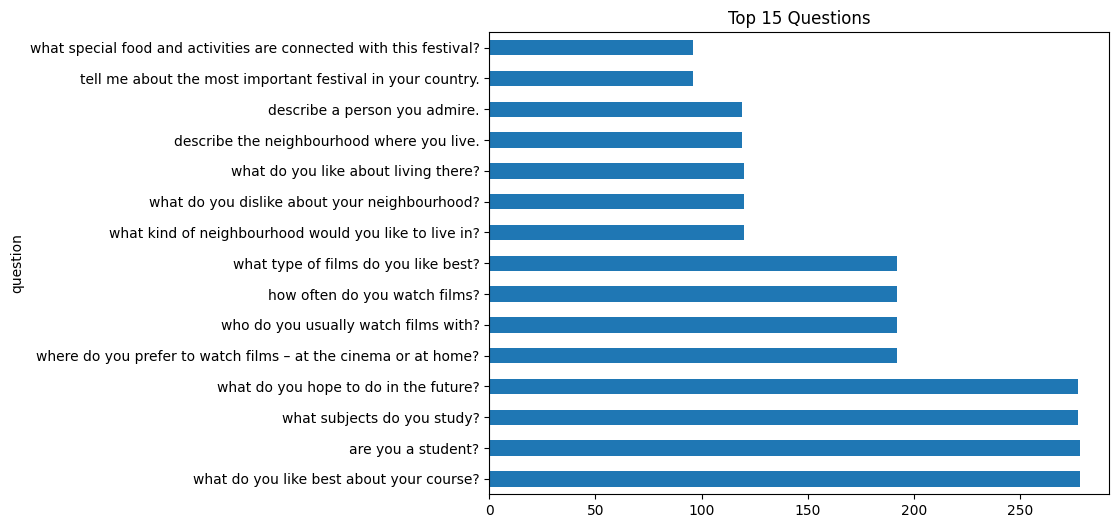

In [16]:
plt.figure(figsize =(8,6))
plt.title("Top 15 Questions")
question_series.value_counts()[:15].plot(kind='barh')

plt.show()

In [17]:
len_question_char = [len(question) for question in question_series]
len_question_token = [len(question.split()) for question in question_series]

print(f"Length characters : {np.average(len_question_char)}, Length tokens (split by space) : {np.average(len_question_token)}")

Length characters : 46.42592862345229, Length tokens (split by space) : 8.883758193736345


<h4>The questions have an average character length of 46.43 and a token length of 8.88.</h4>

<h3>3. Analyst Answer</h3>

In [46]:
answer_series = df["answer"]
answer_series

0       I come from Hanoi - the capital of Vietnam. It...
1       Because Hanoi is a city of peace, there are a ...
2       In Vietnam, we have an interesting festival ta...
3       I have dreamed of visiting Denmark in Europe s...
4       I'd like to talk about my short trip to Baidin...
                              ...                        
6860    In my country, they have changed, be eating ha...
6861    I will just write a television program that I ...
6862    Via miles of advertising on television is, mak...
6863    I will tell you that television advertising ha...
6864    I think there are a lot of people are in flow,...
Name: answer, Length: 6865, dtype: object

In [19]:
collections.Counter(list(answer_series.value_counts()))

Counter({1: 5941, 2: 462})

In [62]:
duplicate_rows = df['answer'][df.duplicated('answer')]
duplicate_rows = duplicate_rows.to_frame()

In [63]:
duplicate_rows.to_json(r'answering_duplicate.json', orient="records")

In [47]:
answer_series.value_counts()

answer
The things I like the most about my course are the lessons and the exercises which are easy to follow and improve my English very much.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

<h4>Out of 6865 answers, there are 5942 unique answers, and 462 answers are duplicates.</h4>

In [20]:
len_answer_char = [len(answer) for answer in answer_series]
len_answer_token = [len(answer.split()) for answer in answer_series]

print(f"Length characters : {np.average(len_answer_char)}, Length tokens (split by space) : {np.average(len_answer_token)}")

Length characters : 418.7678077203205, Length tokens (split by space) : 77.54129643117261


<h4>The answers have an average character length of 418.77 and a token length of 77.54</h4>

In [21]:
import re
pattern = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"
answer_sents = [re.split(pattern, s) for s in list(answer_series)]
answer_sents

[['i come from hanoi - the capital of vietnam.',
  "it's known as the city for peace because there are a lot of historic buildings and monuments associated with the glorious victories of vietnamese people.",
  'in the past, hanoi was an ancient town, and people used bicycles to travel to other places.',
  'now hanoi is developing with more skyscrapers and modern vehicles.',
  'in my mind, hanoi is still a famous city for people come from other cities or other countries to visit.'],
 ['because hanoi is a city of peace, there are a lot of historic buildings and monuments that still remain today.',
  'i have visited two places and i was impressed at first sight.',
  'these two places are called old quarter, and hoa lo prison.',
  'old quarter have been built for a long time, and local people are selling some traditional foods on streets now.',
  'hoa lo prison where retains its ancient features makes me proud of vietnamese history.',
  'these two can help people broaden their minds about 

In [22]:
answer_sents_count = [len(sents) for sents in list(answer_sents)]
print("Length of 10 answer head : ",answer_sents_count[:10])
print(f"Max: {np.max(answer_sents_count)}, Min: {np.min(answer_sents_count)}, Average: {np.mean(answer_sents_count)}")

Length of 10 answer head :  [5, 6, 5, 12, 11, 9, 16, 11, 20, 2]
Max: 28, Min: 1, Average: 4.741150764748725


<h4>The longest answer has 28 sentences, the shortest has 1 sentence, and on average, each answer has 4.74 sentences.</h4>

In [23]:
answer_df = pd.DataFrame({"answer":answer_series, "sents_count": pd.Series(answer_sents_count)})
answer_df

,answer,sents_count
0,i come from hanoi - the capital of vietnam. it...,5
1,"because hanoi is a city of peace, there are a ...",6
2,"in vietnam, we have an interesting festival ta...",5
3,i have dreamed of visiting denmark in europe s...,12
4,i'd like to talk about my short trip to baidin...,11
...,...,...
6860,"in my country, they have changed, be eating ha...",6
6861,i will just write a television program that i ...,15
6862,"via miles of advertising on television is, mak...",7
6863,i will tell you that television advertising ha...,10


In [24]:
counter_sents = collections.Counter(list(answer_df.sents_count))
counter_sents = sorted(counter_sents.items())
print(counter_sents)

counter_sents = ([item[0] for item in counter_sents], [item[1] for item in counter_sents])

[(1, 591), (2, 1442), (3, 1548), (4, 1074), (5, 570), (6, 280), (7, 162), (8, 144), (9, 132), (10, 165), (11, 157), (12, 138), (13, 105), (14, 109), (15, 80), (16, 49), (17, 53), (18, 24), (19, 10), (20, 15), (21, 6), (22, 2), (23, 1), (24, 2), (25, 3), (27, 2), (28, 1)]


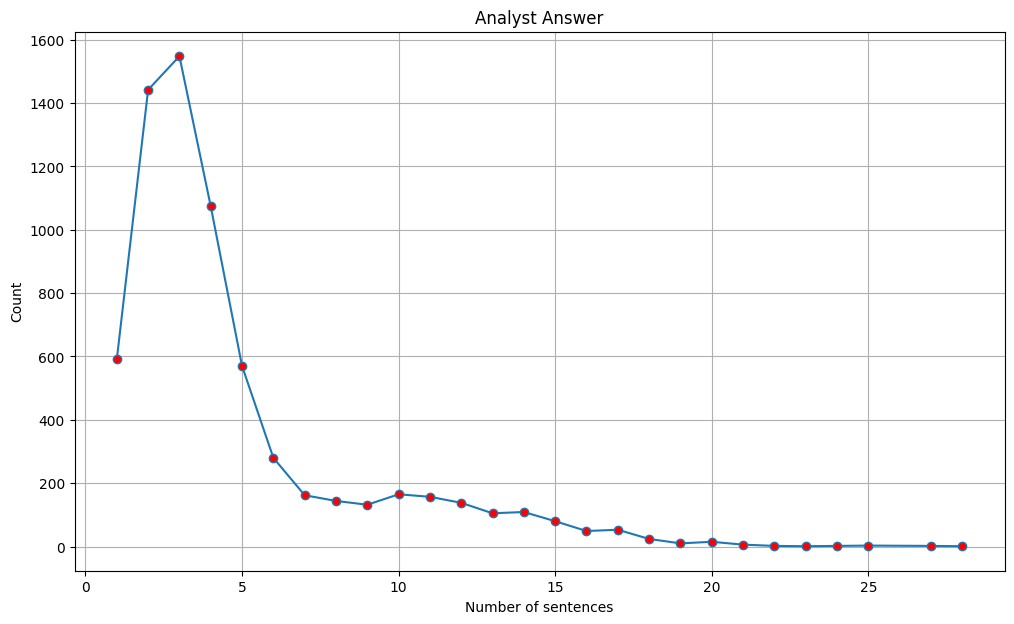

In [25]:
plt.figure(figsize =(12,7))
plt.plot(counter_sents[0], counter_sents[1], marker = 'o', mfc = 'r')
plt.grid()
plt.xlabel("Number of sentences")
plt.ylabel("Count")
plt.title("Analyst Answer")
plt.show()

<h4>The maximum number of sentences in an answer is in the range of 1-5, with fewer answers having more sentences as the number of sentences increases.</h4>

<h1>END.</h1>